In [203]:
import pandas as pd
import locale
import matplotlib.pyplot as plt

locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [204]:
csv = pd.read_csv('Planilha12003a2022.csv', encoding_errors='ignore', delimiter=';')

csv['DATA PGTO'] = csv['DATA PGTO'].str.replace('At ', '')
csv = csv.loc[csv['DATA PGTO'].str.contains('\d+\/\d+\/\d+', regex=True)]
csv['DATA PGTO'] = pd.to_datetime(csv['DATA PGTO'], format='%d/%m/%Y')
csv['VALOR'] = csv['VALOR'].str.replace('R\$ ', '', regex=True).replace('\.', '', regex=True).replace(' ', '',
                                                                                                      regex=True).replace(
    ',', '.', regex=True).where(lambda x: x != '-').astype(float)
csv['ANO'] = pd.DatetimeIndex(csv['DATA PGTO']).year


def gerar_relatorio(ano_inicio, ano_fim):
    gastos_por_servidor = csv.loc[(csv['DATA PGTO'] >= ano_inicio) & (csv['DATA PGTO'] <= ano_fim)]
    gastos_por_servidor = gastos_por_servidor.groupby('CPF SERVIDOR').sum()[['VALOR']].join(
        gastos_por_servidor.groupby('CPF SERVIDOR').count()[['VALOR']].rename(columns={"VALOR": "QNT"})
    )
    gastos_por_servidor = gastos_por_servidor.sort_values('VALOR', ascending=False)

    servidor_sum = gastos_por_servidor.sum()
    valor_total = servidor_sum['VALOR']

    qnt_compras = servidor_sum['QNT']

    return gastos_por_servidor, valor_total, qnt_compras

In [205]:
final = {
    "Lula 1": gerar_relatorio(pd.Timestamp('2003'), pd.Timestamp('2006-12-31')),
    "Lula 2": gerar_relatorio(pd.Timestamp('2007'), pd.Timestamp('2010-12-31')),
    "Dilma 1": gerar_relatorio(pd.Timestamp('2011'), pd.Timestamp('2014-12-31')),
    "Dilma 2": gerar_relatorio(pd.Timestamp('2015'), pd.Timestamp('2016-08-31')),
    "Temmer": gerar_relatorio(pd.Timestamp('2016-09-01'), pd.Timestamp('2018-12-31')),
    "Bolsonaro 1": gerar_relatorio(pd.Timestamp('2019'), pd.Timestamp('2022-12-31'))
}

/tmp/ipykernel_3763/721600824.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gastos_por_servidor = gastos_por_servidor.groupby('CPF SERVIDOR').sum()[['VALOR']].join(
/tmp/ipykernel_3763/721600824.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gastos_por_servidor = gastos_por_servidor.groupby('CPF SERVIDOR').sum()[['VALOR']].join(
/tmp/ipykernel_3763/721600824.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

In [206]:
final_barra = {}

for i in list(final.keys()):
    final_barra[i] = final[i][1]

cores = ['red', 'red', 'red', 'red', 'orange', 'blue', 'red']

[Text(0, 0, 'R$ 22050815,53'),
 Text(0, 0, 'R$ 21937694,52'),
 Text(0, 0, 'R$ 24510243,40'),
 Text(0, 0, 'R$ 8513827,41'),
 Text(0, 0, 'R$ 10255059,39'),
 Text(0, 0, 'R$ 27621657,23')]

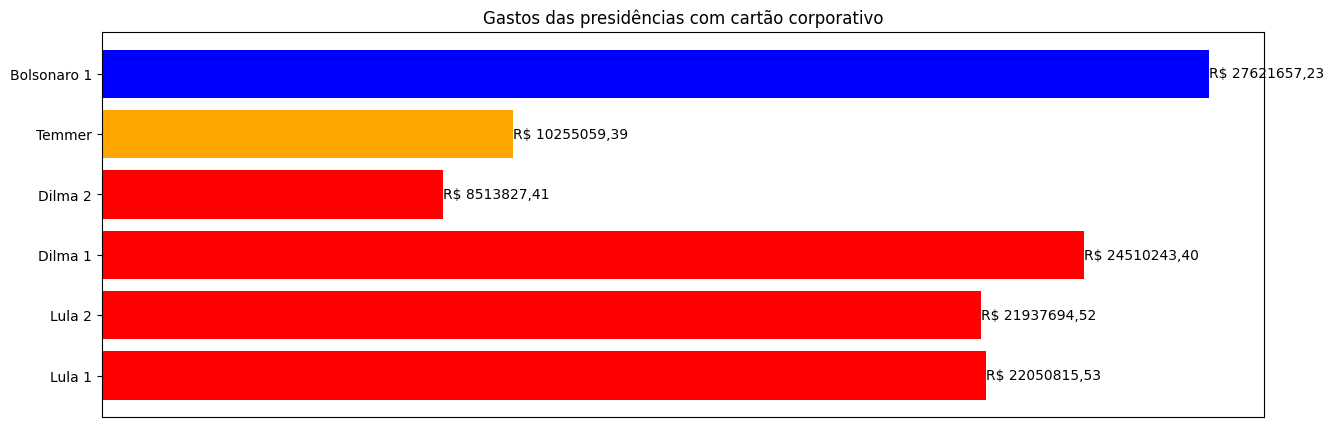

In [209]:
fig, ax = plt.subplots()
ax.set_title('Gastos das presidências com cartão corporativo')
ax.get_xaxis().set_visible(False)
fig.set_figwidth(15)
fig.set_figheight(5)
values = [final[i][1] for i in list(final.keys())]
bars = ax.barh(list(final.keys()), values, color=cores)

ax.bar_label(bars, labels=[locale.currency(i) for i in values], fontsize=10)